Import necessary packages.

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

Load data and check the shape of the df.

In [4]:
df= pd.read_csv('/Users/hoang/Desktop/Jupyter Notebooks/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Check the data types of respective columns. It can be seen that the date_added column has an incorrect type, which will be handled later.

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Check the missing values

In [8]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Replace the missing values with the 'Unknown' value, since it is not optimal to remove entries with missing values. Other options would be to fill in the missing values using summary statistics, but for most of the data is qualitative.

In [10]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

Doublecheck missing values after replacement.

In [12]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Convert the date_added column to datetype.

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors= 'coerce')

Check for duplicates in the dataset, key columns are ids and titles.

In [16]:
duplicate_ids = df[df['show_id'].duplicated()]
duplicate_ids

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [17]:
duplicate_titles = df[df['title'].duplicated()]
duplicate_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


A separate column needs to be made, since it is useful to analyze the average duration of the movies. A special regex has been used so that the minutes are extracted only, when there are two or more digits. Furthermore, the column will be converted to the 'Int64' type, since NaNs are available.

In [19]:
df['duration_minutes'] = df['duration'].str.extract(r'(\d{2,3})\smin')[0]
df['duration_minutes'] = df['duration_minutes'].astype('Int64')

All the graphs below will be made using sns. Most of the graphs should be transparent, however a commentary will be made if further explanation is needed.

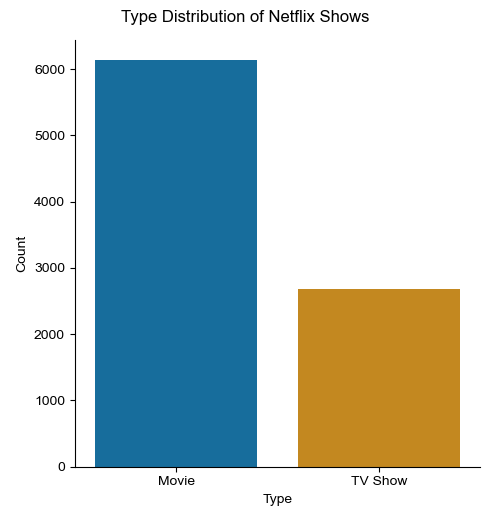

In [21]:
g_type_dist = sns.catplot(data= df, kind='count', x='type', hue='type', palette= 'colorblind')
g_type_dist.fig.suptitle('Type Distribution of Netflix Shows', y= 1.03)
g_type_dist.set(xlabel= 'Type', ylabel='Count')
sns.set_style('darkgrid')

General distribution graph of release years. Its purpose is to inform the user about the distribution. The readibility is not optimal, however below, ther reader can find a more representative graph.

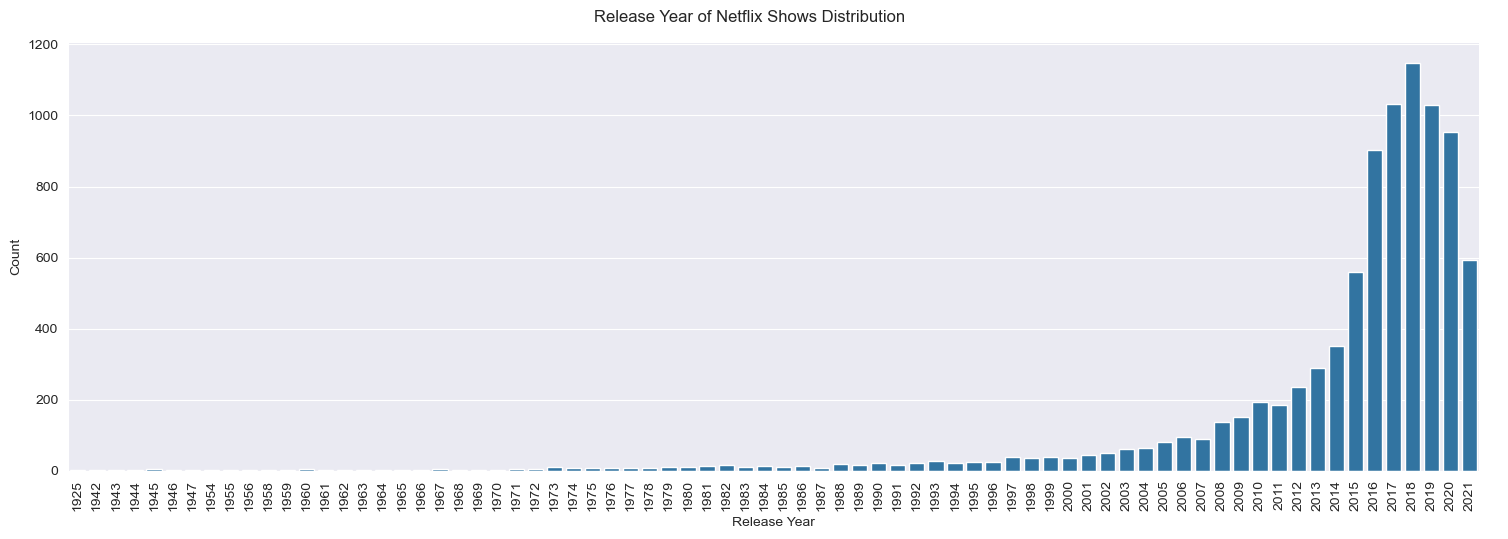

In [23]:
g_release_year = sns.catplot (data= df, kind= 'count', x= 'release_year', aspect= 3)
g_release_year.set_xticklabels(rotation=90)
g_release_year.fig.suptitle('Release Year of Netflix Shows Distribution', y= 1.03)
g_release_year.set(xlabel= 'Release Year', ylabel= 'Count')
sns.set_style('darkgrid')

A graph with the top ten release years makes more sense in this case. Before plotting the graph, the years have to be set as a categorical variable, otherwise the ordering in the sns graph would be incorrect.

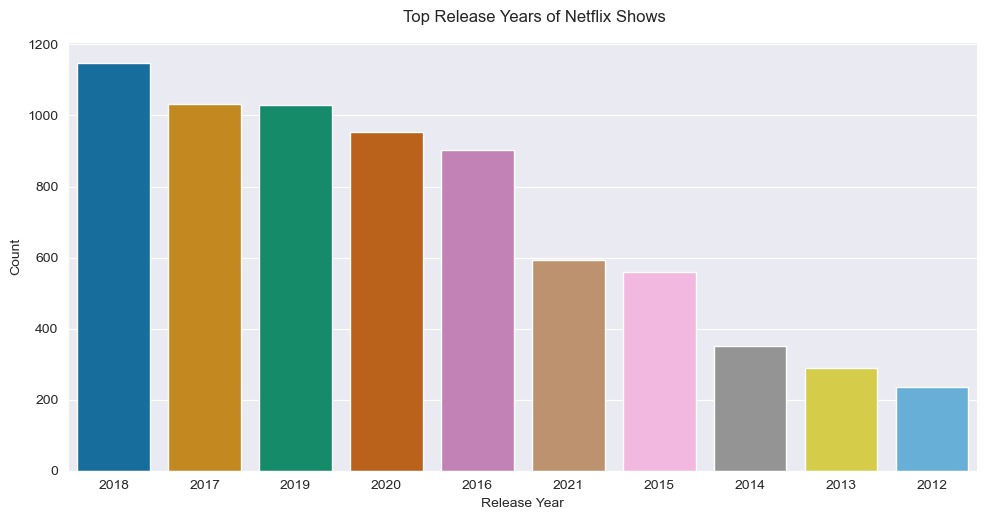

In [25]:
top_year = df['release_year'].value_counts().nlargest(10).reset_index()
top_year.columns = ['release_year', 'count']
top_year = top_year.sort_values(by='count', ascending=False)

top_year['release_year'] = pd.Categorical(top_year['release_year'], categories=top_year['release_year'], ordered=True)

g_top_year = sns.catplot(data=top_year, kind='bar', x='release_year', y='count', aspect=2, hue='release_year', palette='colorblind')
g_top_year.fig.suptitle('Top Release Years of Netflix Shows', y=1.03)
g_top_year.set(xlabel='Release Year', ylabel='Count')
g_top_year._legend.remove()
sns.set_style('darkgrid')

To analyse the country of origins, the original dataframe needs to be split, since one movie can have multiple countries of origin. The split dataframe will be used only for this analysis. The original dataframe cannot be split, since doing so would duplicate rows, which would not be optimal for a general analysis. The same is applicable for following columns: country, director, cast, rating and listed_in.

In [27]:
country_mod_df=df['country'].astype(str).str.split(', ')
country_mod_df=country_mod_df.explode('country').reset_index()
country_mod_df

,index,country
0,0,United States
1,1,South Africa
2,2,Unknown
3,3,Unknown
4,4,India
...,...,...
10840,10840,United States
10841,10841,Unknown
10842,10842,United States
10843,10843,United States


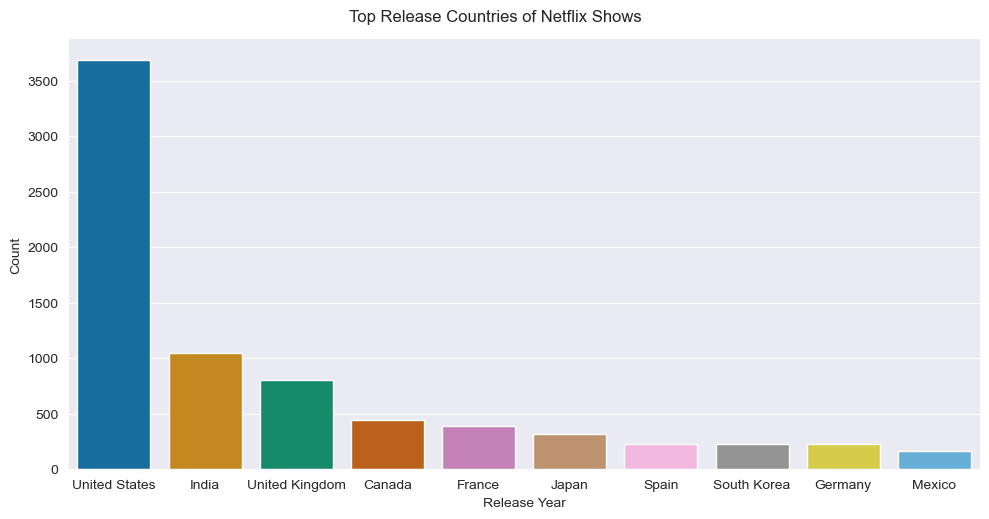

In [28]:
top_country = country_mod_df[country_mod_df['country']!= 'Unknown']['country'].value_counts().nlargest(10).reset_index()
top_country

g_top_country = sns.catplot(data=top_country, kind='bar', x='country', y='count', aspect=2, hue='country', palette= 'colorblind')
g_top_country.fig.suptitle('Top Release Countries of Netflix Shows', y=1.03)
g_top_country.set(xlabel='Release Year', ylabel='Count')
sns.set_style('darkgrid')

g_top_country


In [29]:
director_mod_df=df['director'].astype(str).str.split(', ')
director_mod_df=director_mod_df.explode('director').reset_index()
director_mod_df

,index,director
0,0,Kirsten Johnson
1,1,Unknown
2,2,Julien Leclercq
3,3,Unknown
4,4,Unknown
...,...,...
9607,9607,David Fincher
9608,9608,Unknown
9609,9609,Ruben Fleischer
9610,9610,Peter Hewitt


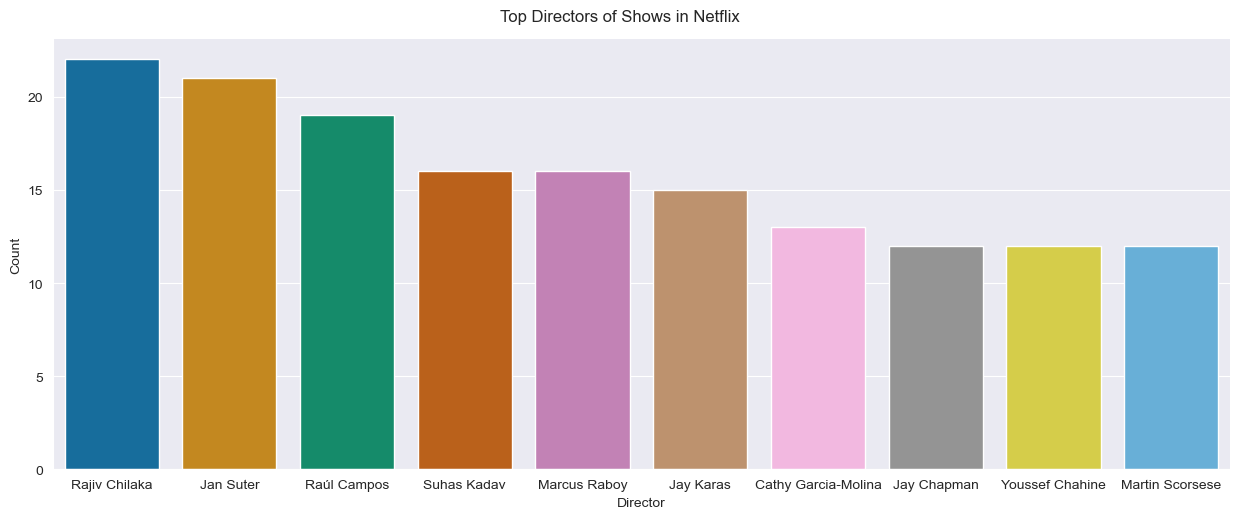

In [30]:
top_director= director_mod_df[director_mod_df['director'] != 'Unknown']['director'].value_counts().nlargest(10).reset_index()
top_director

g_top_director = sns.catplot(data=top_director, kind='bar', x='director', y='count', aspect=2.5, hue= 'director', palette= 'colorblind')
g_top_director.fig.suptitle('Top Directors of Shows in Netflix', y=1.03)
g_top_director.set(xlabel='Director', ylabel='Count')
sns.set_style('darkgrid')

In [31]:
cast_mod_df=df['cast'].astype(str).str.split(', ')
cast_mod_df=cast_mod_df.explode('cast').reset_index()
cast_mod_df

,index,cast
0,0,Unknown
1,1,Ama Qamata
2,2,Khosi Ngema
3,3,Gail Mabalane
4,4,Thabang Molaba
...,...,...
64946,64946,Manish Chaudhary
64947,64947,Meghna Malik
64948,64948,Malkeet Rauni
64949,64949,Anita Shabdish


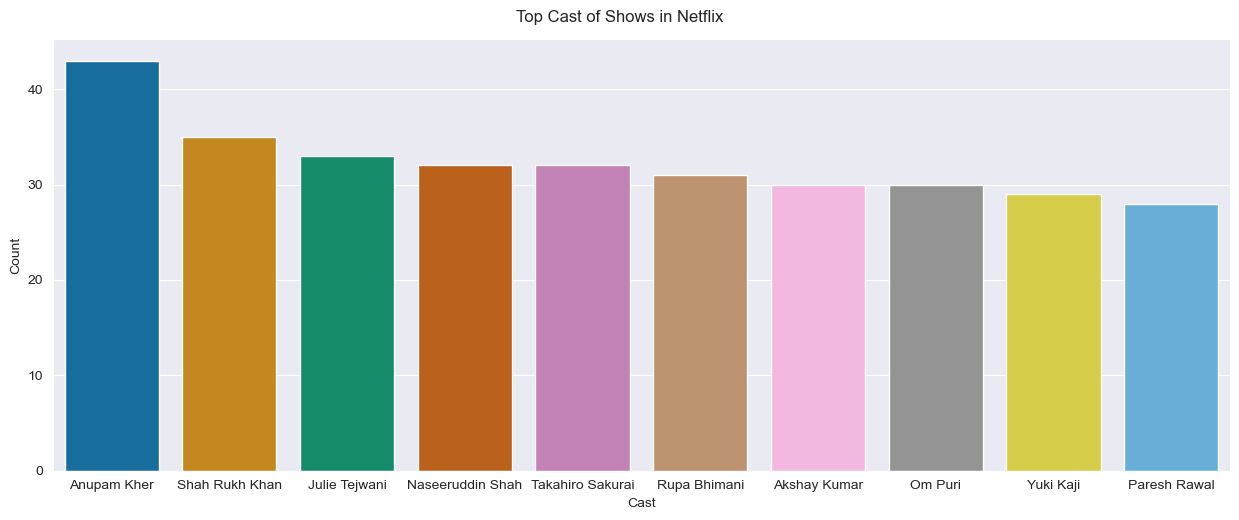

In [32]:
top_cast= cast_mod_df[cast_mod_df['cast'] != 'Unknown']['cast'].value_counts().nlargest(10).reset_index()
top_cast

g_top_cast = sns.catplot(data=top_cast, kind='bar', x='cast', y='count', aspect=2.5, hue= 'cast', palette= 'colorblind')
g_top_cast.fig.suptitle('Top Cast of Shows in Netflix', y=1.03)
g_top_cast.set(xlabel='Cast', ylabel='Count')
sns.set_style('darkgrid')

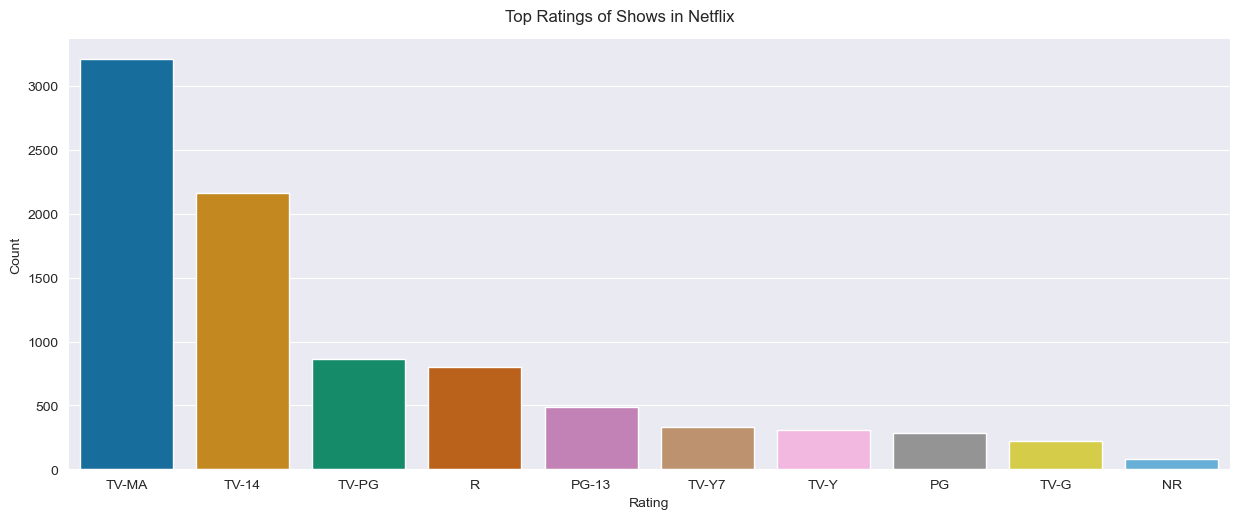

In [33]:
top_rating= df[df['rating'] != 'Unknown']['rating'].value_counts().nlargest(10).reset_index()
top_rating


g_top_rating = sns.catplot(data=top_rating, kind='bar', x='rating', y='count', aspect=2.5, hue= 'rating', palette= 'colorblind')
g_top_rating.fig.suptitle('Top Ratings of Shows in Netflix', y=1.03)
g_top_rating.set(xlabel='Rating', ylabel='Count')
sns.set_style('darkgrid')

Text(0.5, 1.03, 'Movie Duration Distribution in Netflix')

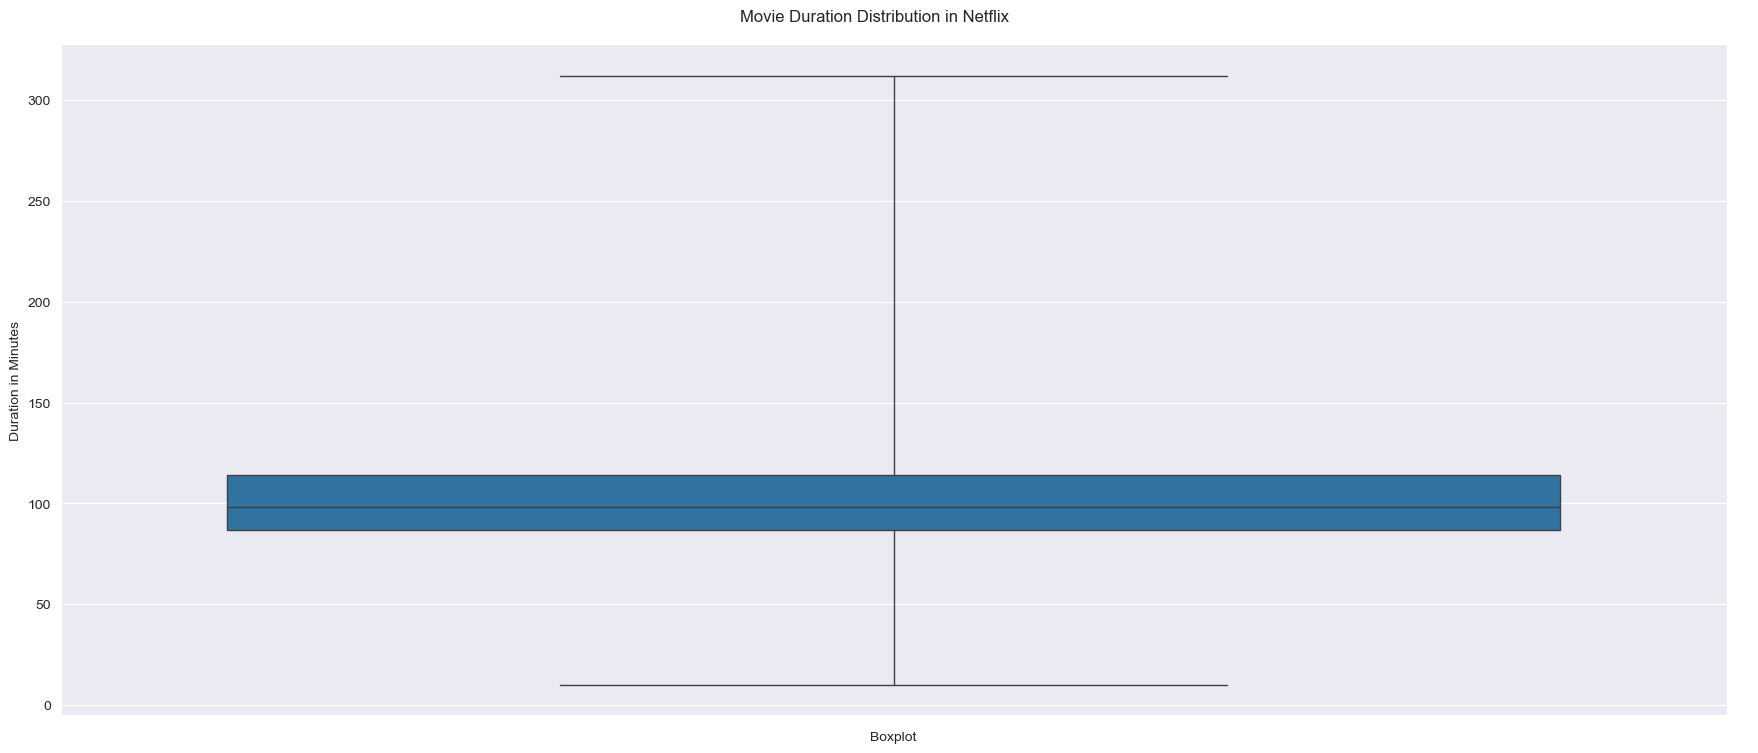

In [34]:
g_average_duration = sns.catplot(data=df[df['duration_minutes']!= None]['duration_minutes'].reset_index(), kind='box', y='duration_minutes', height=7, aspect=2.5, whis= [0,100])
g_average_duration.set(ylabel= 'Duration in Minutes', xlabel= 'Boxplot')
g_average_duration.fig.suptitle('Movie Duration Distribution in Netflix', y=1.03)

In [35]:
df[df['duration_minutes']!= None]['duration_minutes'].describe()

count       6124.0
mean     99.638145
std      28.198991
min           10.0
25%           87.0
50%           98.0
75%          114.0
max          312.0
Name: duration_minutes, dtype: Float64

Performing certain operation so that the difference between the date added and release year can be interpreted. The difference will be calculated in months.

In [37]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce', format='%Y')

df['date_diff_months'] = (df['date_added'].dt.year - df['release_year'].dt.year) * 12 + \
                         (df['date_added'].dt.month - df['release_year'].dt.month)

From the boxplot, it can be seen that the lowest value is negative. That does not make sense, since a movie or series cannot be added before the release year. The assumption is that soem of the data are incorrect, therefore a further investigation needs to be done. Outliers on the other side can also be seen. Some entries have the date diff in months that are larger than 800. Those will also be investigated.

Text(0.5, 1.03, 'Difference between Date Added and Release Year')

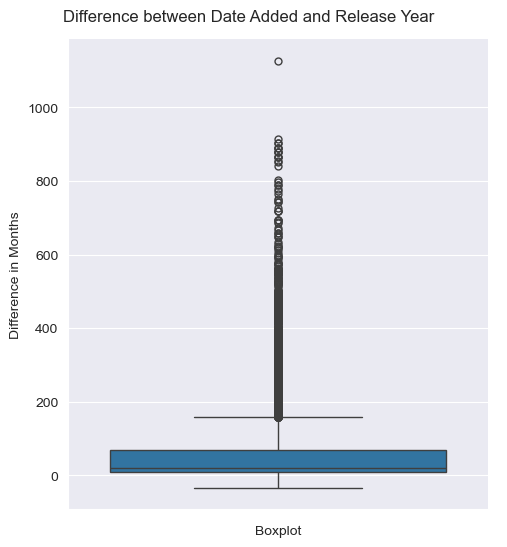

In [39]:
g_date_diff= sns.catplot(data= df['date_diff_months'].reset_index(), y='date_diff_months', kind='box')
g_date_diff.set(ylabel= 'Difference in Months', xlabel= 'Boxplot')
g_date_diff.fig.suptitle('Difference between Date Added and Release Year', y=1.03)

In [40]:
df['date_diff_months'].describe()

count    8709.000000
mean       61.944081
std       105.599443
min       -34.000000
25%         8.000000
50%        19.000000
75%        68.000000
max      1127.000000
Name: date_diff_months, dtype: float64

Below, the reader can see, which shows have incorrect values.

In [42]:
df[df['date_diff_months'] < 0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,date_diff_months
1551,s1552,TV Show,Hilda,Unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021-01-01,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",<NA>,-1.0
1696,s1697,TV Show,Polly Pocket,Unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland",2020-11-15,2021-01-01,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...,<NA>,-2.0
2920,s2921,TV Show,Love Is Blind,Unknown,"Nick Lachey, Vanessa Lachey",United States,2020-02-13,2021-01-01,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...,<NA>,-11.0
3168,s3169,TV Show,Fuller House,Unknown,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,2019-12-06,2020-01-01,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,<NA>,-1.0
3287,s3288,TV Show,Maradona in Mexico,Unknown,Diego Armando Maradona,"Argentina, United States, Mexico",2019-11-13,2020-01-01,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",<NA>,-2.0
3369,s3370,TV Show,BoJack Horseman,Unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2019-10-25,2020-01-01,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,<NA>,-3.0
3433,s3434,TV Show,The Hook Up Plan,Unknown,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2019-10-11,2020-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",<NA>,-3.0
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,Unknown,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United States,2018-05-30,2019-01-01,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...,<NA>,-8.0
4845,s4846,TV Show,Arrested Development,Unknown,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,2018-05-29,2019-01-01,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,<NA>,-8.0
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2017-07-01,2018-01-01,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,86,-6.0


To be exact, there are 14 shows with incorrect values, that will be ignored in the further analysis.

In [44]:
df[df['date_diff_months'] < 0].count()

show_id             14
type                14
title               14
director            14
cast                14
country             14
date_added          14
release_year        14
rating              14
duration            14
listed_in           14
description         14
duration_minutes     2
date_diff_months    14
dtype: int64

Furthermore, the differences on the other side need to be investigated. As can be seen below, there are no suspicious values. That means all the values look normal, since there can be older shows.

In [46]:
df[df['date_diff_months'] > 800]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,date_diff_months
1331,s1332,TV Show,Five Came Back: The Reference Films,Unknown,Unknown,United States,2021-02-09,1945-01-01,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...,<NA>,913.0
1699,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,2020-11-15,1954-01-01,TV-G,120 min,"Children & Family Movies, Classic Movies, Come...",Two war buddies fall for two sisters and follo...,120,802.0
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown,Unknown,Unknown,2018-12-30,1925-01-01,TV-14,1 Season,TV Shows,This collection restores films from women who ...,<NA>,1127.0
7219,s7220,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,2017-03-31,1945-01-01,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...,63,866.0
7294,s7295,Movie,Let There Be Light,John Huston,Walter Huston,United States,2017-03-31,1946-01-01,TV-PG,58 min,"Classic Movies, Documentaries",Some returning combat veterans suffer scars th...,58,854.0
7575,s7576,Movie,Nazi Concentration Camps,George Stevens,Unknown,United States,2017-03-31,1945-01-01,TV-MA,59 min,"Classic Movies, Documentaries",Shocking footage shows Nazi concentration camp...,59,866.0
7743,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",Unknown,United States,2017-02-01,1946-01-01,TV-14,1 Season,TV Shows,This newly preserved collection features more ...,<NA>,853.0
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,2017-03-31,1942-01-01,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52,902.0
7930,s7931,Movie,San Pietro,John Huston,Unknown,United States,2017-03-31,1945-01-01,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",32,866.0
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942-01-01,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18,902.0


Below, the new boxplot can be seen, which does not include negative values and also, the whiskers have been adjusted so that the max and min values can be seen.

Text(0.5, 1.03, 'Difference between Date Added and Release Year Adjusted')

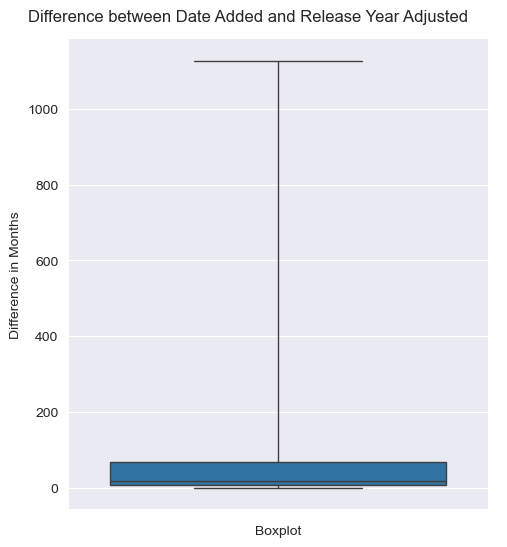

In [48]:
g_date_diff_mod= sns.catplot(data= df[df['date_diff_months'] >= 0].reset_index(), y='date_diff_months', kind='box', whis= [0,100])
g_date_diff_mod.set(ylabel= 'Difference in Months', xlabel= 'Boxplot')
g_date_diff_mod.fig.suptitle('Difference between Date Added and Release Year Adjusted', y=1.03)

In [49]:
listed_in_mod_df=df['listed_in'].astype(str).str.split(', ')
listed_in_mod_df=listed_in_mod_df.explode('listed_in').reset_index()
listed_in_mod_df

,index,listed_in
0,0,Documentaries
1,1,International TV Shows
2,2,TV Dramas
3,3,TV Mysteries
4,4,Crime TV Shows
...,...,...
19318,19318,Children & Family Movies
19319,19319,Comedies
19320,19320,Dramas
19321,19321,International Movies


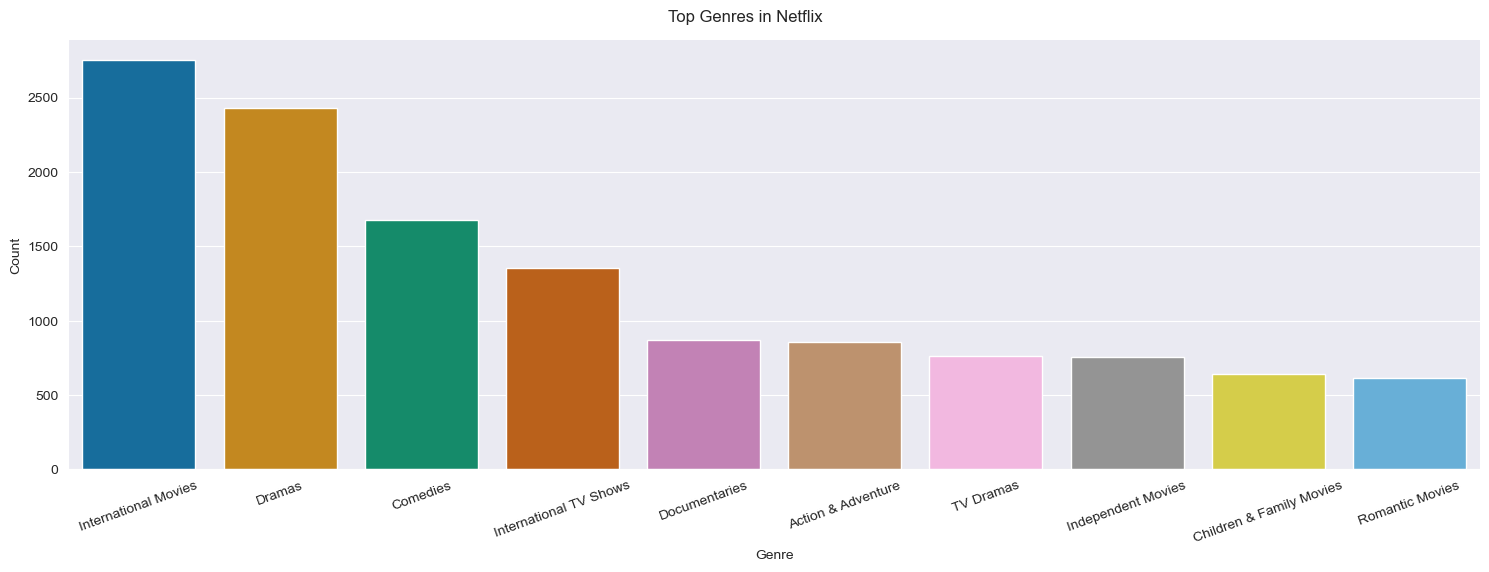

In [50]:
top_listed_in= listed_in_mod_df[listed_in_mod_df['listed_in'] != 'Unknown']['listed_in'].value_counts().nlargest(10).reset_index()
top_listed_in

g_top_listed_in = sns.catplot(data=top_listed_in, kind='bar', x='listed_in', y='count', aspect=3, hue= 'listed_in', palette= 'colorblind')
g_top_listed_in.fig.suptitle('Top Genres in Netflix', y=1.03)
g_top_listed_in.set(xlabel='Genre', ylabel='Count')
g_top_listed_in.set_xticklabels(rotation=20)

sns.set_style('darkgrid')